In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('../data/working_files/caches_raw.csv')
df[['Latitude', 'Longitude', 'Code', 'Name', 'Difficulty', 'Terrain', 'CacheType', 'Container']].head()


/Users/christina/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (33,57) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Latitude,Longitude,Code,Name,Difficulty,Terrain,CacheType,Container
0,34.994067,-85.59935,GC1A1E7,Nickajack Two for One,2.0,1.5,T,Micro
1,34.994067,-85.59935,GC1A1E7,Nickajack Two for One,2.0,1.5,T,Micro
2,34.994067,-85.59935,GC1A1E7,Nickajack Two for One,2.0,1.5,T,Micro
3,34.994067,-85.59935,GC1A1E7,Nickajack Two for One,2.0,1.5,T,Micro
4,34.994067,-85.59935,GC1A1E7,Nickajack Two for One,2.0,1.5,T,Micro


In [33]:
homey = 33 + 57.809/60
homex = -84 - 29.546/60

In [34]:
df = df[['Latitude', 'Longitude', 'Code', 'Name', 'Difficulty', 'Terrain', 'CacheType', 'Container']].drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12526 entries, 0 to 125712
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    12526 non-null  float64
 1   Longitude   12526 non-null  float64
 2   Code        12526 non-null  object 
 3   Name        12526 non-null  object 
 4   Difficulty  12526 non-null  float64
 5   Terrain     12526 non-null  float64
 6   CacheType   12526 non-null  object 
 7   Container   12526 non-null  object 
dtypes: float64(4), object(4)
memory usage: 880.7+ KB


In [35]:
X = list(df['Longitude'])
Y = list(df['Latitude'])

distances = []
for n in range(len(X)):
    dx = (X[n]-homex)*6371*(np.pi/180)*np.cos(homey*np.pi/180)
    dy = (Y[n]-homey)*6371*(np.pi/180)
    distances.append((dx**2 + dy**2)**0.5)

df['distance'] = distances

df.sort_values(by='distance').head(10)

,Latitude,Longitude,Code,Name,Difficulty,Terrain,CacheType,Container,distance
42880,33.961333,-84.496483,GC3D92N,Pike's Point,1.5,1.0,T,Micro,0.443461
42474,33.968233,-84.492367,GC8P3BN,East Lake Cache,2.0,2.5,T,Regular,0.528174
42920,33.961683,-84.498700,GC3D4N6,Overlook Point,3.5,2.5,T,Other,0.611628
42979,33.960250,-84.498400,GC3D5GA,Eiffel's Vertex,2.5,2.0,M,Micro,0.657314
42298,33.969217,-84.488900,GC478MZ,Sherlock's Cache,3.5,1.5,U,Micro,0.716003
42198,33.971417,-84.489000,GC8R46D,Just Dance,1.5,1.5,T,Small,0.937287
42660,33.967217,-84.501867,GCRYRK,Out of the Loop,1.5,2.0,T,Micro,0.963995
43140,33.954367,-84.490617,GCM99V,Sewell Series,4.5,3.0,M,Regular,1.027437
42318,33.965385,-84.479064,GC8WH4K,Montclair,1.5,1.0,T,Regular,1.250979
43441,33.950383,-84.493200,GC7TZQK,Streak Extender No. 23,1.5,1.5,T,Micro,1.458406


In [36]:
homey, homex

(33.963483333333336, -84.49243333333334)

In [38]:
features = pd.read_csv('../data/working_files/features.csv')
features['feature type'].value_counts()

numerical      9
binary         6
text           4
identifiers    2
categorical    2
datetime       1
Name: feature type, dtype: int64

In [48]:
features[features['feature type']=='datetime'][['feature']]

,feature
14,placed


In [45]:
df = pd.read_csv('../data/working_files/caches_raw.csv')
df.info()

/Users/christina/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (33,57) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125722 entries, 0 to 125721
Data columns (total 90 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   lParent           125722 non-null  object 
 1   lLogId            125722 non-null  int64  
 2   lType             125722 non-null  object 
 3   lBy               125722 non-null  object 
 4   lDate             125722 non-null  object 
 5   lLat              0 non-null       float64
 6   lLon              0 non-null       float64
 7   lEncoded          125722 non-null  int64  
 8   lownerid          125722 non-null  int64  
 9   lHasHtml          125722 non-null  int64  
 10  lIsowner          125722 non-null  int64  
 11  lTime             125722 non-null  object 
 12  lParent.1         125722 non-null  object 
 13  lLogId.1          125722 non-null  int64  
 14  lText             125706 non-null  object 
 15  Code              125722 non-null  object 
 16  Name              12

In [66]:
scores = pd.read_csv('../data/working_files/predictive_scores.csv')
chk0 = scores[scores['features used']=='numeric,binary,dummies+log sentiment'].sort_values(by='f1-score', ascending=False)[0:3]
chk0


,model,features used,accuracy,recall,precision,f1-score
8,RandomForestClassifier,"numeric,binary,dummies+log sentiment",0.748693,0.705096,0.756272,0.729788
12,AdaBoostClassifier,"numeric,binary,dummies+log sentiment",0.718536,0.660819,0.729032,0.693252
10,BaggingClassifier,"numeric,binary,dummies+log sentiment",0.716526,0.639098,0.736994,0.684564


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

scoretypes = ['accuracy', 'f1-score', 'precision']
models = []
scores = []
for scoretype in scoretypes:
    models = models + list(chk0['model'])
    scores = scores + list(chk0[scoretype])
types = ['Accuracy' for n in range(3)] + ['f1-Score' for n in range(3)] + ['Precision' for n in range(3)]

chk = pd.DataFrame({'model': models, 'score': scores, 'scoretype': types})
chk


,model,score,scoretype
0,RandomForestClassifier,0.748693,Accuracy
1,AdaBoostClassifier,0.718536,Accuracy
2,BaggingClassifier,0.716526,Accuracy
3,RandomForestClassifier,0.729788,f1-Score
4,AdaBoostClassifier,0.693252,f1-Score
5,BaggingClassifier,0.684564,f1-Score
6,RandomForestClassifier,0.756272,Precision
7,AdaBoostClassifier,0.729032,Precision
8,BaggingClassifier,0.736994,Precision


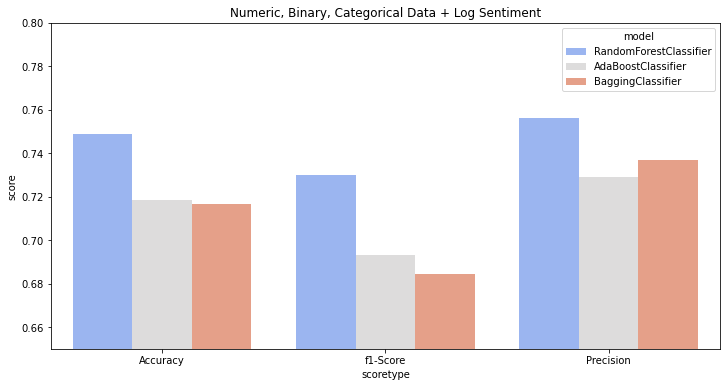

In [79]:
fig = plt.figure(figsize=(12,6));
ax = sns.barplot(x="scoretype", y="score", hue="model", data=chk, palette="coolwarm")
plt.ylim([0.65, 0.8]);
plt.title('Numeric, Binary, Categorical Data + Log Sentiment');

In [85]:
df = pd.read_csv('../data/working_files/cleaned_data.csv')
fp0 = list(df['fav_points'])
fp = [1 if f>1 else 0 for f in fp0]
df['fav_points'] = fp
df['fav_points'].value_counts(normalize=True)

0    0.518781
1    0.481219
Name: fav_points, dtype: float64

In [89]:
scores = pd.read_csv('../data/working_files/predictive_scores_rf.csv')
scores

,model,features used,accuracy,recall,precision,f1-score
0,"RandomForest n_est=10, max_depth=2",NEW CACHE feature list,0.647768,0.427736,0.728307,0.538947
1,"RandomForest n_est=10, max_depth=3",NEW CACHE feature list,0.654604,0.452799,0.726542,0.557900
2,"RandomForest n_est=10, max_depth=4",NEW CACHE feature list,0.673904,0.577277,0.693775,0.630187
3,"RandomForest n_est=10, max_depth=5",NEW CACHE feature list,0.679936,0.628237,0.681777,0.653913
4,"RandomForest n_est=10, max_depth=6",NEW CACHE feature list,0.685163,0.595656,0.704545,0.645541
5,"RandomForest n_est=10, max_depth=10",NEW CACHE feature list,0.697226,0.629908,0.708647,0.666962
6,"RandomForest n_est=10, max_depth=20",NEW CACHE feature list,0.691998,0.588972,0.720123,0.647978
7,"RandomForest n_est=10, max_depth=None",NEW CACHE feature list,0.690792,0.579783,0.722917,0.643486
8,"RandomForest n_est=50, max_depth=2",NEW CACHE feature list,0.654202,0.453634,0.724967,0.558068
9,"RandomForest n_est=50, max_depth=3",NEW CACHE feature list,0.659831,0.478697,0.720755,0.575301


In [91]:
import pickle
filename1 = '../3_PopularityPredictorAppDevelopment/modelfornewcaches.sav'
rf = pickle.load(open(filename1, 'rb'))


In [92]:
X2 = pd.read_csv('../data/working_files/X2.csv')
X2_dilute = X2.copy()
X2_dilute = X2_dilute[['difficulty',
       'terrain', 'size', 'status', 'is_premium',
       'short_description', 'long_description', 'hints', 'travel_bugs', 'cache_type_Earth',
       'cache_type_Event', 'cache_type_Letterbox',
       'cache_type_Lost and Found Event', 'cache_type_Maze Exhibit',
       'cache_type_Mega event', 'cache_type_Multi', 'cache_type_Traditional',
       'cache_type_Unknown/Mystery', 'cache_type_Virtual', 'cache_type_Webcam',
       'cache_type_Wherigo']]
X2_dilute.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12433 entries, 0 to 12432
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   difficulty                       12433 non-null  float64
 1   terrain                          12433 non-null  float64
 2   size                             12433 non-null  float64
 3   status                           12433 non-null  int64  
 4   is_premium                       12433 non-null  int64  
 5   short_description                12433 non-null  int64  
 6   long_description                 12433 non-null  int64  
 7   hints                            12433 non-null  int64  
 8   travel_bugs                      12433 non-null  int64  
 9   cache_type_Earth                 12433 non-null  int64  
 10  cache_type_Event                 12433 non-null  int64  
 11  cache_type_Letterbox             12433 non-null  int64  
 12  cache_type_Lost an

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
y = df['fav_points']
X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size=0.2, random_state=42, stratify=y)
rf.fit(X_train,y_train)
preds = rf.predict(X_test)


In [99]:
cm = confusion_matrix(y_test,preds)
cm

array([[1019,  271],
       [ 358,  839]])

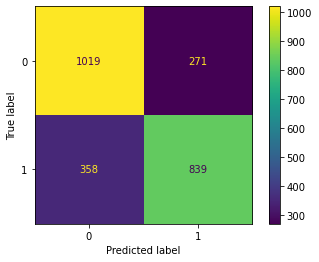

In [106]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1']).plot();


In [102]:
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1290
           1       0.76      0.70      0.73      1197

    accuracy                           0.75      2487
   macro avg       0.75      0.75      0.75      2487
weighted avg       0.75      0.75      0.75      2487



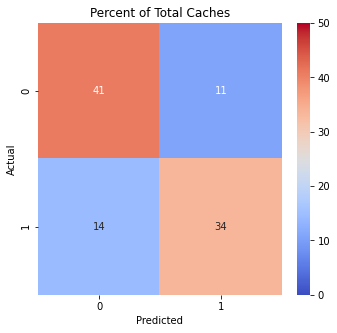

In [113]:
cm = cm*100/sum(sum(cm)); # convert to percent of total comments
fig = plt.figure(figsize=(12,5));
ax = fig.add_subplot(122);
sns.heatmap(cm,ax=ax,annot=True, vmin = 0, vmax = 50, cmap='coolwarm');
ax.set_xticklabels([0, 1]);
ax.set_yticklabels([0, 1]);
plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.title('Percent of Total Caches');

## Summary notes for these clusters:

| cluster # | number of caches | noted characteristics |
|--- |---   |--- |
| 0  | 2908 | |
| 1  | 821  | Much more likely to be premium access only |
| 2  | 965  | Somewhat more difficult than normal |
| ...|      |                                   |
| 7  | 134  | Consistently size=0 (more likely to have no container) |
| ...|      |                                   |
| 10 | 93   | Fairly consistently size of 2-3 (small-regular) |
| ...|      |                                   |
| 17 | 60   | All difficulty = 2.5; All terrain = 2.5; Likely to be size = 3 (regular) |
| ...|      |                                   |
| 29 | 4    | 100% of the logs are neutral type |
| ...|      |                                   |
| 46 | 467  | Much more likely to acquire travel bugs |
| ...|      |                                   |


In [116]:
feature_import = pd.read_csv('../data/working_files/predictive_feature_import.csv')
feature_import

,feature,importance
0,difficulty,0.263414
1,terrain,0.204609
2,size,0.159353
3,status,0.009626
4,is_premium,0.047004
5,short_description,0.044982
6,long_description,0.019873
7,hints,0.041675
8,travel_bugs,0.024998
9,cache_type_Earth,0.007654


In [117]:
rec1 = pd.read_csv('../data/working_files/recommender1.csv')
rec1.head()

,0,1,2,3,4,5,6,7,8,9,...,12423,12424,12425,12426,12427,12428,12429,12430,12431,12432
0,0.000000,1.063022,1.050701,1.420944,0.998758,1.106185,0.906218,1.033566,1.073541,0.752167,...,1.217909,1.151795,1.023544,1.171667,1.058419,1.025897,0.942470,0.962410,1.131513,0.943785
1,1.063022,0.000000,0.837859,1.293393,0.255934,0.468983,0.964311,0.108104,0.116134,0.533808,...,1.256306,1.103369,0.941331,1.025828,1.038530,0.859433,1.210004,1.214650,1.155378,0.594296
2,1.050701,0.837859,0.000000,1.126544,0.838164,0.935861,0.954170,0.862013,0.876246,0.350360,...,1.092241,1.046441,0.990456,1.043356,1.012250,1.005031,1.048107,1.146003,1.064805,0.837889
3,1.420944,1.293393,1.126544,0.000000,1.267423,0.958776,1.002403,1.270507,1.191855,1.304639,...,0.883901,0.908603,1.135949,0.837568,1.173980,1.162204,1.079335,0.835041,0.879847,1.173386
4,0.998758,0.255934,0.838164,1.267423,0.000000,0.219804,0.645744,0.355442,0.554732,0.588293,...,1.158928,1.122530,0.929678,1.044323,0.904917,0.967742,1.216945,1.365808,1.080741,0.435544
